In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

In [79]:
df= pd.read_csv('datasetr.csv')

In [80]:
type(df)

pandas.core.frame.DataFrame

In [81]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
df.shape

(614, 13)

In [83]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [84]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df.drop('Loan_ID', axis=1, inplace=True)

In [86]:
df.drop(['Gender','Dependents','CoapplicantIncome'],axis=1,inplace=True)

In [87]:
df.isnull().sum()

Married              3
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [88]:
df = df.fillna(df.mode().iloc[0])

In [89]:
df.isnull().sum()

Married             0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [90]:
# label encoding
df.replace({'Loan_Status':{'N':0,'Y':1}})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13056\4072547250.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status':{'N':0,'Y':1}})


,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,Graduate,No,5849,120.0,360.0,1.0,Urban,1
1,Yes,Graduate,No,4583,128.0,360.0,1.0,Rural,0
2,Yes,Graduate,Yes,3000,66.0,360.0,1.0,Urban,1
3,Yes,Not Graduate,No,2583,120.0,360.0,1.0,Urban,1
4,No,Graduate,No,6000,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...
609,No,Graduate,No,2900,71.0,360.0,1.0,Rural,1
610,Yes,Graduate,No,4106,40.0,180.0,1.0,Rural,1
611,Yes,Graduate,No,8072,253.0,360.0,1.0,Urban,1
612,Yes,Graduate,No,7583,187.0,360.0,1.0,Urban,1


In [91]:
# df['Dependents'].value_counts()

In [92]:
# df=df.replace(to_replace='3+',value=4)

In [93]:
# df['Dependents'].value_counts()

<Axes: xlabel='Education', ylabel='count'>

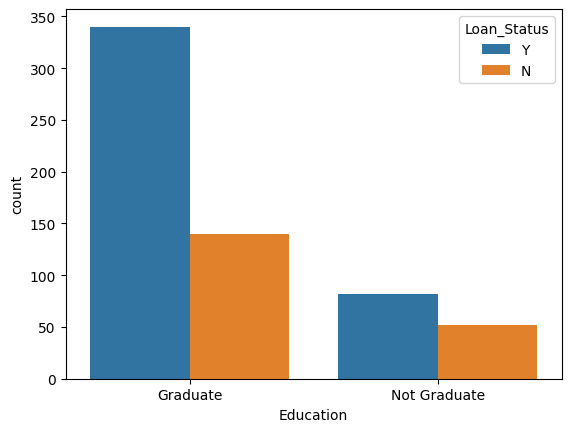

In [94]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

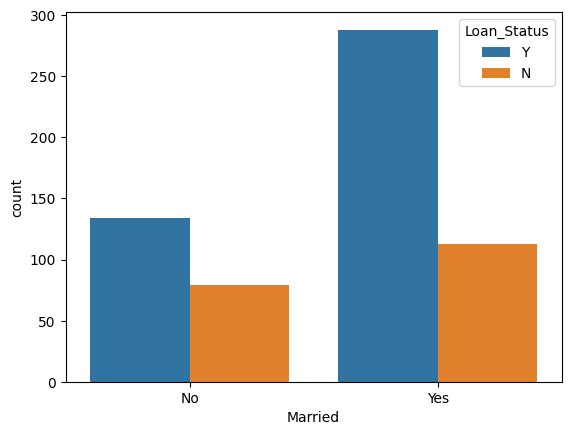

In [95]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [96]:
# convert categorical columns to numerical columns
df.replace({
    'Married':{'No':0,'Yes':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Loan_Status':{'Y':1,'N':0}}
    ,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13056\361874232.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [97]:
df.head()

,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,5849,120.0,360.0,1.0,2,1
1,1,1,0,4583,128.0,360.0,1.0,0,0
2,1,1,1,3000,66.0,360.0,1.0,2,1
3,1,0,0,2583,120.0,360.0,1.0,2,1
4,0,1,0,6000,141.0,360.0,1.0,2,1


In [98]:
# separating the data and label

X= df.drop(columns=['Loan_Status'],axis=1)
Y=df['Loan_Status']

In [99]:
print(X)


     Married  Education  Self_Employed  ApplicantIncome  LoanAmount  \
0          0          1              0             5849       120.0   
1          1          1              0             4583       128.0   
2          1          1              1             3000        66.0   
3          1          0              0             2583       120.0   
4          0          1              0             6000       141.0   
..       ...        ...            ...              ...         ...   
609        0          1              0             2900        71.0   
610        1          1              0             4106        40.0   
611        1          1              0             8072       253.0   
612        1          1              0             7583       187.0   
613        0          1              1             4583       133.0   

     Loan_Amount_Term  Credit_History  Property_Area  
0               360.0             1.0              2  
1               360.0             1.0

In [100]:
df.describe()

,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.476373,0.413389,0.340446,6109.041673,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,150.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [101]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [102]:
# Train test split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [103]:
print(X.shape,X_train.shape,X_test.shape)

(614, 8) (491, 8) (123, 8)


In [104]:
# Training the Model

model=svm.SVC(kernel='linear')

In [105]:
# training the support Vector Machine model

model.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [106]:
#Model Evaluation

X_train_prediction= model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [107]:
print('Accuracy on training Data', training_data_accuracy)

Accuracy on training Data 0.7820773930753564


In [108]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [109]:
print('Accuracy on test data', test_data_accuracy)

Accuracy on test data 0.7642276422764228


Making a predictive system

In [110]:
pickle.dump(model, open('model.pkl', 'wb'))